# Elektromos áram fogyasztás frekvenciatartománybeli elemzése

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd

In [9]:
mavir_15min = pd.read_csv(
    "../data/limited/mavir_15min.csv",
    parse_dates=True,
    index_col="Időpont"
)

## Időtartománybeli elemzés

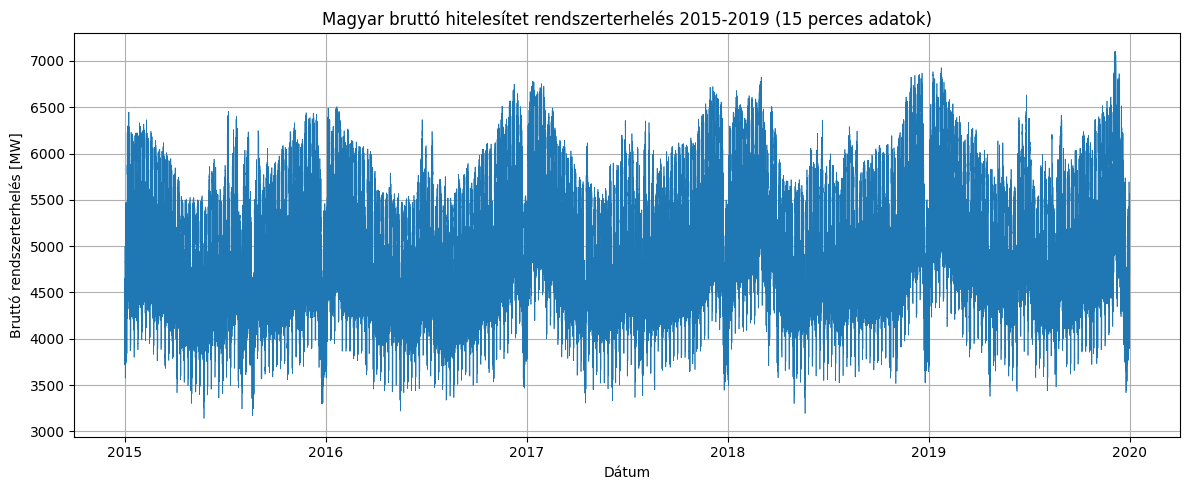

In [10]:
plt.show()
plt.figure(figsize=(12, 5))
plt.plot(mavir_15min, linewidth=0.5)
plt.title("Magyar bruttó hitelesítet rendszerterhelés 2015-2019 (15 perces adatok)")
plt.xlabel("Dátum")
plt.ylabel("Bruttó rendszerterhelés [MW]")
plt.grid(True)
plt.tight_layout()
plt.savefig("../docs/figures/electricity_time.png")
plt.savefig("../docs/figures/electricity_time.svg")
plt.show()

## Fourier transzformáció

In [11]:
data_series = mavir_15min["Bruttó hitelesített rendszerterhelés tény"].interpolate()
y = data_series.values
N = len(y)
T = 15.0

yf = np.fft.fft(y)
xf = np.fft.fftfreq(N, d=T)[:N//2]
amplitudes = 2.0 / N * np.abs(yf[:N//2])

xf_per_day = xf * 60 * 24

## Ábrázolás

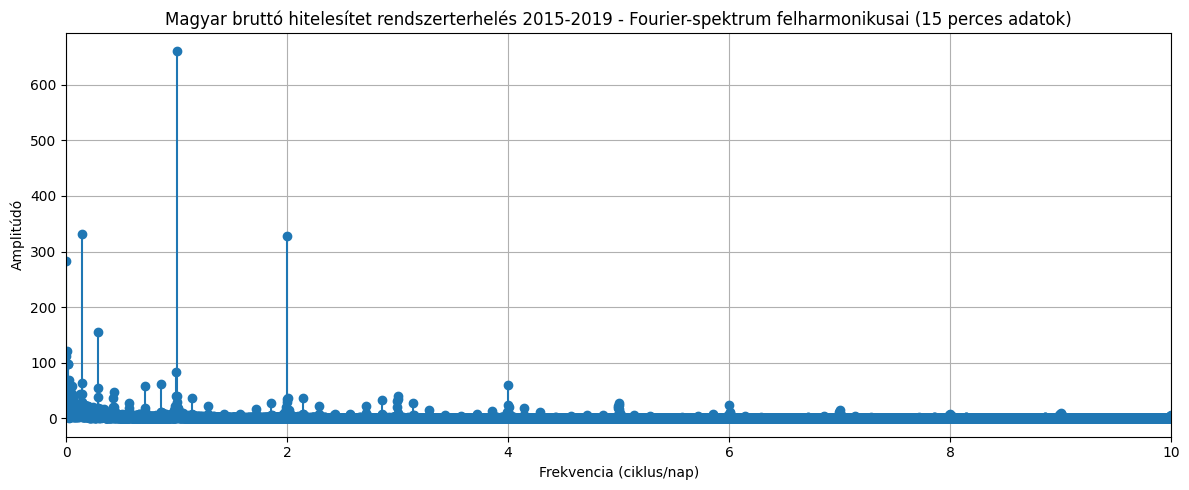

In [12]:
plt.figure(figsize=(12, 5))
plt.stem(xf_per_day[1:], amplitudes[1:], basefmt=" ")
plt.title("Magyar bruttó hitelesítet rendszerterhelés 2015-2019 - Fourier-spektrum felharmonikusai (15 perces adatok)")
plt.xlabel("Frekvencia (ciklus/nap)")
plt.ylabel("Amplitúdó")
plt.xlim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.savefig("../docs/figures/electricity_fourier.png")
plt.savefig("../docs/figures/electricity_fourier.svg")
plt.show()